In [1]:
from PIL import Image

In [2]:
image_path = 'photos/jasne.jpg'

In [3]:
image_pil = Image.open(image_path)

In [6]:
import cv2
from matplotlib import pyplot as plt

In [7]:
image = cv2.imread(image_path)

In [8]:
plt.imshow(image)

NameError: name 'plt' is not defined

In [6]:
from skimage import io, color, util, transform, morphology, filters, feature
import numpy as np
%matplotlib inline

In [7]:
image = io.imread(image_path)

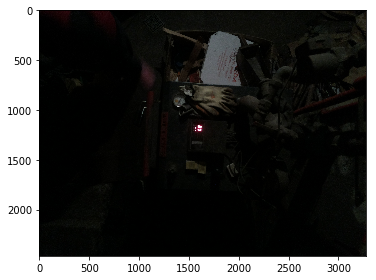

In [8]:
io.imshow(image)

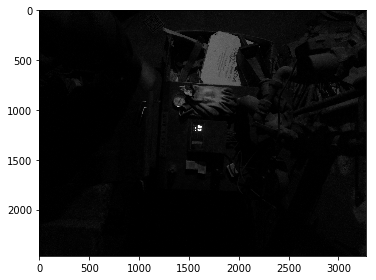

In [183]:
grey_image = color.rgb2grey(image)
io.imshow(grey_image)

In [184]:
x1, y1, x2, y2 = 1582, 1220, 1640, 1148

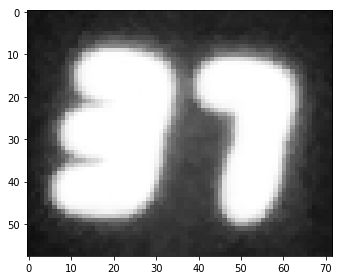

In [185]:
# cropped = util.crop(grey_image, ((y2, y1), (x1, x2)))
cropped = grey_image[y2:y1,x1:x2]
rotated = transform.rotate(cropped, 90, resize=True)
io.imshow(rotated)

In [55]:
new_image_path = 'photos/cropped.jpg'
io.imsave(new_image_path, rotated)

e:\moje pliki\programy\.python_envs\temperaturereader\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


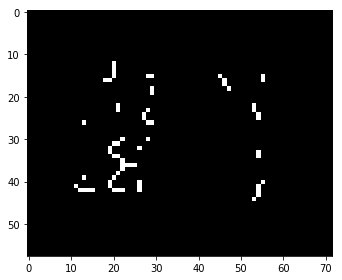

In [186]:
skeleton = morphology.skeletonize(rotated)
io.imshow(skeleton)

(<Figure size 720x576 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017445B52F28>,
       dtype=object))

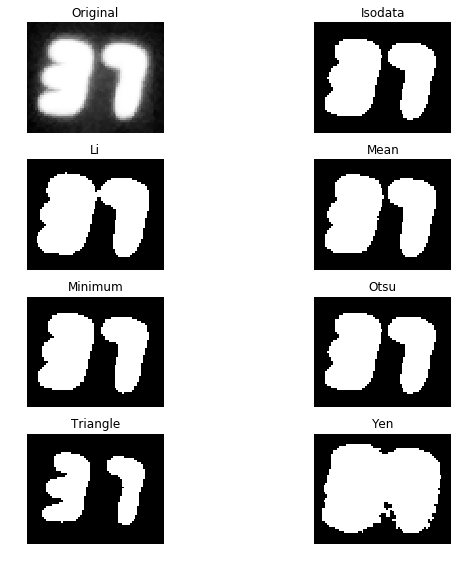

In [187]:
filters.try_all_threshold(rotated, figsize=(10, 8), verbose=False)

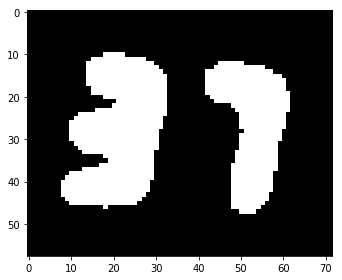

In [188]:
## Global threshold
# manual_value = 0.98
# thresholded = rotated > 0.98
threshold_value = filters.threshold_triangle(rotated)
thresholded = rotated > threshold_value
io.imshow(thresholded)

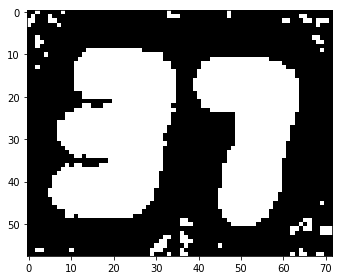

In [189]:
## Local threshold
# manual_value = 0.98
# thresholded = rotated > 0.98
threshold_value = filters.threshold_local(rotated, block_size=23)
thresholded = rotated > threshold_value
io.imshow(thresholded)

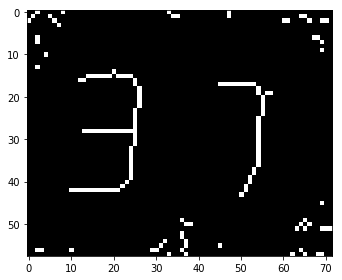

In [190]:
skeleton = morphology.skeletonize(thresholded)
io.imshow(skeleton)

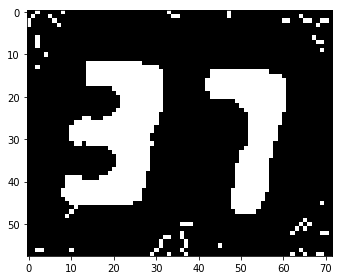

In [191]:
## Thinning
thinned = morphology.thin(thresholded, max_iter=3)
io.imshow(thinned)

In [117]:
new_image_path = 'photos/temp.png'
io.imsave(new_image_path, thresholded)

e:\moje pliki\programy\.python_envs\temperaturereader\lib\site-packages\skimage\io\_io.py:142: UserWarning: photos/temp.png is a boolean image: setting True to 1 and False to 0
  warn('%s is a boolean image: setting True to 1 and False to 0' % fname)


In [192]:
image_pil = Image.fromarray(util.img_as_int(thinned))
print(pytesseract.image_to_string(image_pil))

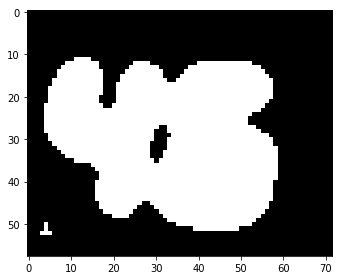

In [166]:
median_image = filters.median(thresholded, morphology.disk(3))
io.imshow(median_image)

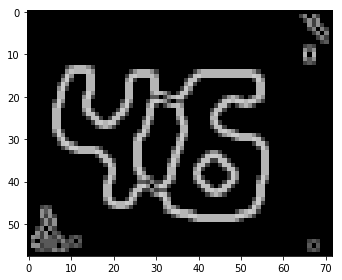

In [175]:
edges = filters.sobel(thinned)
io.imshow(edges)

In [9]:
from skimage import io, transform, color, filters, morphology

def fetch_temperature(raw_image_path):
    full_image = load_image(raw_image_path)
    temperature_image_color = fetch_temperature_area(full_image)
    processed_temperature_image = apply_image_processing(temperature_image_color)
    
    return processed_temperature_image

def load_image(image_path):
    return io.imread(image_path)

def fetch_temperature_area(full_image):
    x1, y1, x2, y2 = 1582, 1220, 1640, 1148
    temperature_area = full_image[y2:y1,x1:x2]
    return transform.rotate(temperature_area, 90, resize=True)

def apply_image_processing(image):
    image_grey = convert_to_grey(image)
    thresholded = apply_thresholding(image_grey)
    thinned = apply_thin(thresholded)
    clean_image = cleanup_image(thinned)
    
    return clean_image

def convert_to_grey(image_color):
    return color.rgb2grey(image_color)

def apply_thresholding(image_grey):
    threshold_value = filters.threshold_local(image_grey, block_size=23)
    thresholded = image_grey > threshold_value
    
    return thresholded

def apply_thin(image_grey):
    return morphology.thin(image_grey, max_iter=3)

def cleanup_image(image):
    opened_image =  morphology.opening(image, selem=morphology.disk(2))
    return morphology.remove_small_objects(opened_image, min_size=100)
    

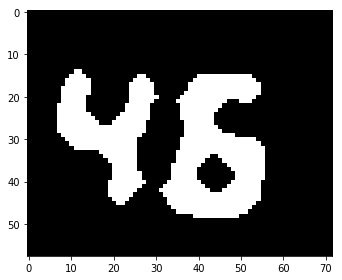

In [14]:
image_path = "photos/ciemne.jpg"
temperature_image = fetch_temperature(image_path)
io.imshow(temperature_image)

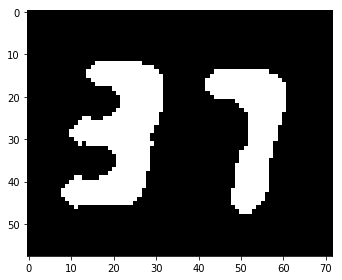

In [15]:
image_path = "photos/jasne.jpg"
temperature_image = fetch_temperature(image_path)
io.imshow(temperature_image)

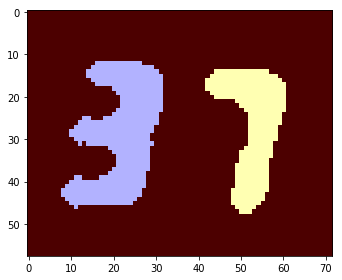

In [16]:
from skimage.measure import label, regionprops
from skimage import color

labeled_image = label(temperature_image)
labeled_image_overlay = color.label2rgb(labeled_image, image=temperature_image)

io.imshow(labeled_image_overlay)

478
(35, 24)
329
(34, 19)


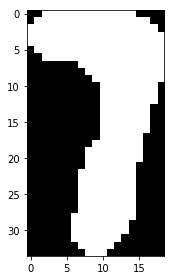

In [17]:
for region in regionprops(labeled_image):
    print(region.area)
    digit_image = region.image
    print(digit_image.shape)
    io.imshow(digit_image)

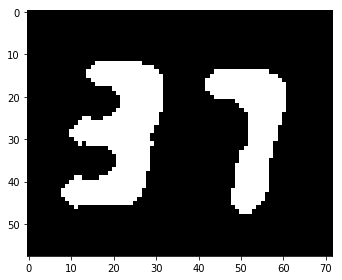

In [18]:
clear_image = morphology.remove_small_objects(temperature_image, min_size=100)
io.imshow(clear_image)

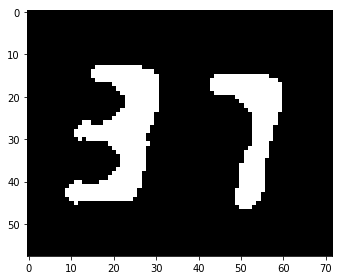

In [19]:
eroded_image = morphology.erosion(temperature_image, selem=morphology.disk(1))
io.imshow(eroded_image)

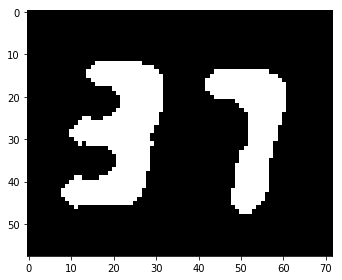

In [20]:
opened_image = morphology.opening(temperature_image, selem=morphology.disk(1))
io.imshow(opened_image)

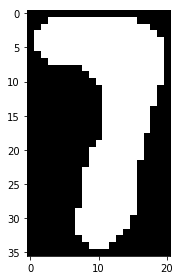

In [21]:
padded_digit_image = np.pad(digit_image, 1, 'constant', constant_values=False)
io.imshow(padded_digit_image)

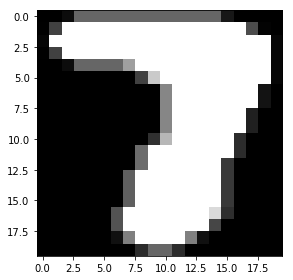

In [26]:
resized_image = transform.resize(padded_digit_image, (20,20), mode='reflect', preserve_range=True)
io.imshow(resized_image)

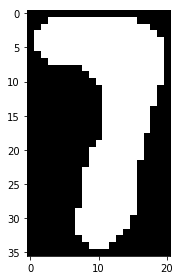

In [23]:
io.imshow(padded_digit_image)

In [5]:
print("jarus")

jarus


In [1]:
import os
from config import project_root
from src.temperature_reader import TemperatureReader

image = os.path.join(project_root, 'notebooks', 'photos', 'image_0.jpg')
reader = TemperatureReader()

reader.load_and_process_image(image)


ModuleNotFoundError: No module named 'config'

In [112]:
import os
from datetime import datetime
%matplotlib inline

from skimage import io, transform, color, filters, morphology, measure, util
import numpy as np

project_root = "E:/Moje Pliki/Programy/TemperatureReader/backend"


class TemperatureReaderError(Exception):
    pass


class TemperatureReader:
    """
    Class reads temperature value from given image (photo).
    Uses some image processing to extract temperature from image,
    and simple machine learning classifier to read temperature value.
    """

    def __init__(self):
        self.original_image = None
        self.processed_image = None
        self.temperature_digits = tuple()
        # self.bad_images_count = 0
        # self.ok_images_count = 0
        self._is_display_off = False

    def load_and_process_image(self, image_path):
        self._is_display_off = False
        self.original_image = io.imread(image_path)
        self._apply_image_processing()
        self._fetch_temperature_digits()

    def get_temperature(self):
        pass

    def is_display_off(self):
        """
        Checks if display with temperature digits is off.
        Method checks currently processed image, so caller
        is expected to invoke process_image method first in
        order to update current image.
        :return: True is display is off; False otherwise
        """
        # For now check if processing of the current image resulted in isolating valid digits.
        # This can be misleading in some cases, so it can be replaced with more sophisticated method.
        # E.g. some trained context classifier.
        return self._is_display_off

    def save_digits_to_file(self):
        relative_folder = os.path.join('images', 'digits')
        digits_file_prefix = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

        file_name = f"{digits_file_prefix}_1.jpg"
        self._save_image(self.temperature_digits[0], os.path.join(relative_folder, file_name))

        file_name = f"{digits_file_prefix}_2.jpg"
        self._save_image(self.temperature_digits[1], os.path.join(relative_folder, file_name))

    def _fetch_temperature_digits(self):
        labeled_image = measure.label(self.processed_image)
        image_regions = measure.regionprops(labeled_image)
        print(image_regions[0].centroid)

        if len(image_regions) == 2:
            # Processing returned valid results
            self.temperature_digits = (
                self._pad_and_resize(image_regions[0].image),
                self._pad_and_resize(image_regions[1].image)
            )
#             io.imshow(self.temperature_digits[1])
            return

        elif len(image_regions) == 0:
            # No region could be isolated
            # Probably screen is off
            self._is_display_off = True
            return

        # Only one region could be isolated, meaning probably that image processing pipeline could not split
        # temperature to single digits, or there is more regions isolated than expected.
        # In any case this probably means that processing pipeline should be adjusted so save source and
        # fetched temperature images to file

        bad_images_folder_name = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        bad_images_folder_relative_path = os.path.join('images', 'bad', bad_images_folder_name)

        bad_images_folder_full_path = os.path.join(project_root, bad_images_folder_relative_path)
#         os.mkdir(bad_images_folder_full_path)

        original_file_relative = os.path.join(bad_images_folder_relative_path, "original.jpg")
#         self._save_image(self.original_image, original_file_relative)

        processed_file = os.path.join(bad_images_folder_relative_path, "processed.jpg")
#         self._save_image(self.processed_image, processed_file)

        raise TemperatureReaderError(f"Was not able to fetch single digits from image. Image was saved in"
                                     f"'{bad_images_folder_relative_path}' folder")

    def _apply_image_processing(self):
        image_grey = color.rgb2grey(self.original_image)  # Convert to gray scale
        image_grey = util.invert(image_grey)
#         io.imshow(image_grey)
#         print(image_grey)
        threshold_image = self.apply_threshold(image_grey)
#         io.imshow(threshold_image)
        thinned = self.apply_thin(threshold_image)
#         io.imshow(thinned)
        clean_image = self.cleanup_image(thinned)
        io.imshow(clean_image)

        self.processed_image = clean_image

    @staticmethod
    def apply_threshold(image_grey):
        threshold_value = filters.threshold_local(image_grey, block_size=113)
        threshold_image = image_grey > threshold_value

        return threshold_image

    @staticmethod
    def apply_thin(image_grey):
        return morphology.thin(image_grey, max_iter=3)

    @staticmethod
    def cleanup_image(image):
        opened_image = morphology.opening(image, selem=morphology.disk(2))

        return morphology.remove_small_objects(opened_image, min_size=1000)

    @staticmethod
    def _save_image(image, relative_path):
        full_path = os.path.join(project_root, relative_path)
        io.imsave(full_path, image)

    @staticmethod
    def _pad_and_resize(image):
        padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=False)

        return transform.resize(padded_image, (35, 25), mode='reflect', preserve_range=True)

(123.28212996389891, 99.7586642599278)


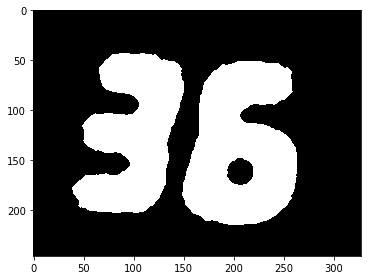

In [113]:
image = os.path.join(project_root, 'notebooks', 'photos', 'image_1.jpg')
reader = TemperatureReader()

reader.load_and_process_image(image)

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt

class TemperatureReaderError(Exception):
    pass


class TemperatureReader:
    """
    Class reads temperature value from given image (photo).
    Uses some image processing to extract temperature from image,
    and simple machine learning classifier to read temperature value.
    """

    def __init__(self):
        self.original_image = None
        self.processed_image = None
        self.temperature_digits = tuple()
        self._is_display_off = False
        self._partially_processed_images = dict()

    def load_and_process_image(self, image_path):
        self._is_display_off = False
        self.original_image = io.imread(image_path)
        plt
        self._apply_image_processing()
        self._fetch_temperature_digits()

    def get_temperature(self):
        pass

    def is_display_off(self):
        """
        Checks if display with temperature digits is off.
        Method checks currently processed image, so caller
        is expected to invoke process_image method first in
        order to update current image.
        :return: True is display is off; False otherwise
        """
        # For now check if processing of the current image resulted in isolating valid digits.
        # This can be misleading in some cases, so it can be replaced with more sophisticated method.
        # E.g. some trained context classifier.
        return self._is_display_off

    def save_digits_to_file(self):
        relative_folder = os.path.join('images', 'digits')
        digits_file_prefix = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

        file_name = f"{digits_file_prefix}_1.jpg"
        self._save_image(self.temperature_digits[0], os.path.join(relative_folder, file_name))

        file_name = f"{digits_file_prefix}_2.jpg"
        self._save_image(self.temperature_digits[1], os.path.join(relative_folder, file_name))

    def _fetch_temperature_digits(self):
        labeled_image = measure.label(self.processed_image)
        image_regions = measure.regionprops(labeled_image)

        if len(image_regions) == 2:
            # Processing returned valid results
            self.temperature_digits = self._determine_digits_order(image_regions)
            plt.subplot(1, 4, 3)
            io.imshow(self.temperature_digits[0])
            plt.subplot(1, 4, 4)
            io.imshow(self.temperature_digits[1])
            print(f"Resized shape: {self.temperature_digits[0].shape}")
            return

        elif len(image_regions) == 0:
            # No region could be isolated
            # Probably screen is off
            self._is_display_off = True
            return

        # Only one region could be isolated, meaning probably that image processing pipeline could not split
        # temperature to single digits, or there is more regions isolated than expected.
        # In any case this probably means that processing pipeline should be adjusted so save source and
        # fetched temperature images to file
        self._handle_image_processing_error()

    def _handle_image_processing_error(self):
        """
        Handles case when image processing pipeline could not return valid results.
        All images from image processing pipeline are saved to file.
        """

        bad_images_folder_name = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
        bad_images_folder_relative_path = os.path.join('images', 'bad', bad_images_folder_name)

        bad_images_folder_full_path = os.path.join(project_root, bad_images_folder_relative_path)
        os.mkdir(bad_images_folder_full_path)

        for image_name in self._partially_processed_images:
            file = os.path.join(bad_images_folder_relative_path, f"{image_name}.jpg")
            self._save_image(self._partially_processed_images[image_name], file)

        raise TemperatureReaderError(f"Was not able to fetch single digits from image. Images was saved"
                                     f" in '{bad_images_folder_relative_path}' folder")

    def _determine_digits_order(self, regions):
        """
        Returns tuple of digits images in correct order
        """
        first_object_position_x = regions[0].centroid[0]
        second_object_position_x = regions[1].centroid[0]
        
        plt.subplot(1, 4, 1)
        io.imshow(regions[0].image)
        plt.subplot(1, 4, 2)
        io.imshow(regions[1].image)
        print(f"Original shape: {regions[1].image.shape}")

        if first_object_position_x < second_object_position_x:
            return (
                self._pad_and_resize(regions[0].image),
                self._pad_and_resize(regions[1].image)
            )

        return (
                self._pad_and_resize(regions[1].image),
                self._pad_and_resize(regions[0].image)
            )

    def _apply_image_processing(self):
        image_grey = color.rgb2grey(self.original_image)  # Convert to gray scale

        # Invert to get black background and white object
        # Some algorithms do not work correctly in different conditions
        image_grey = util.invert(image_grey)

        threshold_image = self.apply_threshold(image_grey)
        thinned = self.apply_thin(threshold_image)
        clean_image = self.cleanup_image(thinned)

        self._partially_processed_images = {
            "0_original": self.original_image,
            "1_grayed_inverted": image_grey,
            "2_after_threshold": threshold_image,
            "3_thinned": thinned,
            "4_processed": clean_image
        }

        self.processed_image = clean_image

    @staticmethod
    def apply_threshold(image_grey):
        threshold_value = filters.threshold_local(image_grey, block_size=113)
        threshold_image = image_grey > threshold_value

        return threshold_image

    @staticmethod
    def apply_thin(image_grey):
        return morphology.thin(image_grey, max_iter=3)

    @staticmethod
    def cleanup_image(image):
        opened_image = morphology.opening(image, selem=morphology.disk(2))

        return morphology.remove_small_objects(opened_image, min_size=1000)

    @staticmethod
    def _save_image(image, relative_path):
        full_path = os.path.join(project_root, relative_path)
        io.imsave(full_path, image)

    @staticmethod
    def _pad_and_resize(image):
        padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=False)

        return transform.resize(padded_image, (22, 16), mode='reflect', preserve_range=True)

Original shape: (165, 116)
Resized shape: (22, 16)


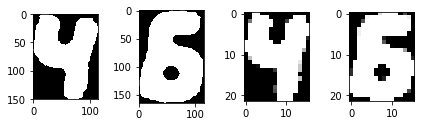

In [156]:
image = os.path.join(project_root, 'notebooks', 'photos', 'image_4.jpg')
reader = TemperatureReader()

reader.load_and_process_image(image)